# Introduction:
https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors?fbclid=IwAR2RW7aziTsVgSq8USLaYooMBW_ZG7mPDQ7W8g-zuvyN143nBsm9q64ydHU

### Read the CSV file and explore the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# create a dataframe 
concatenated_data = pd.DataFrame()

# read the 5 csv data from year 2019 to 2023
for year in range(2019, 2024):
    filename = "WHR_{}.csv".format(year)  
    data = pd.read_csv(filename)  # read the csv data
    data['year'] = year # add one column named "year" to the data
    print("{} data has {} rows and {} columns".format(year, data.shape[0], data.shape[1]))
    concatenated_data = pd.concat([concatenated_data, data], ignore_index=True)  # concatenates  dataframs along an 0 axis 

    
concatenated_data.head()


2019 data has 156 rows and 10 columns
2020 data has 153 rows and 10 columns
2021 data has 149 rows and 10 columns
2022 data has 146 rows and 10 columns
2023 data has 137 rows and 10 columns


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [2]:
# save the concatenated data to csv
concatenated_data.to_csv('WHR_concatenated_with_year.csv', index=False)

In [3]:
"""
We found that different year data has different number of rows but same number of columns.
"""

'\nWe found that different year data has different number of rows but same number of columns.\n'

#### Concatenate 5 dataframes of year 2023~2019 on country

In [4]:
year_2019 = pd.read_csv("WHR_2019.csv")
year_2019["year"] = 2019
print(year_2019[year_2019["country"].duplicated()])
print("-------------------------------------------------------------------")
# there are 2 rows for country Cyprus in data 2019 which are row 48 and 63
print(year_2019[year_2019["country"] =="Cyprus"]) 

   country          region  happiness_score  gdp_per_capita  social_support  \
63  Cyprus  Western Europe            5.718           1.263           1.252   

    healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
63                    1.042                         0.417       0.191   

    perceptions_of_corruption  year  
63                      0.162  2019  
-------------------------------------------------------------------
   country          region  happiness_score  gdp_per_capita  social_support  \
48  Cyprus  Western Europe            6.046           1.263           1.223   
63  Cyprus  Western Europe            5.718           1.263           1.252   

    healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
48                    1.042                         0.406       0.190   
63                    1.042                         0.417       0.191   

    perceptions_of_corruption  year  
48                      0.041  2019  
63              

In [5]:
year_2020 = pd.read_csv("WHR_2020.csv") # year 2020 has no duplicated rows
year_2020["year"] = 2020
print(year_2020[year_2020["country"].duplicated()]) # there are  no duplicted rows in data 2020
print("-------------------------------------------------------------------")

Empty DataFrame
Columns: [country, region, happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption, year]
Index: []
-------------------------------------------------------------------


In [6]:
year_2021 = pd.read_csv("WHR_2021.csv") # year 2021 has no duplicated rows
year_2021["year"] = 2021
print(year_2021[year_2021["country"].duplicated()]) # there are  no duplicted rows in data 2021
print("-------------------------------------------------------------------")

Empty DataFrame
Columns: [country, region, happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption, year]
Index: []
-------------------------------------------------------------------


In [7]:
year_2022 = pd.read_csv("WHR_2022.csv") # year 2022 has no duplicated rows
year_2022["year"] = 2022
print(year_2022[year_2022["country"].duplicated()]) # # there are  no duplicted rows in data 2022
print("-------------------------------------------------------------------")

Empty DataFrame
Columns: [country, region, happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption, year]
Index: []
-------------------------------------------------------------------


In [8]:
year_2023 = pd.read_csv("WHR_2023.csv") # year 2023 has no duplicated rows
year_2023["year"] = 2023
print(year_2023[year_2023["country"].duplicated()]) # there are  no duplicted rows in data 2023
print("-------------------------------------------------------------------")

Empty DataFrame
Columns: [country, region, happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption, year]
Index: []
-------------------------------------------------------------------


#### So far we already know:

2019 data has 156 rows and 10 columns and 1 duplicated rows for Cyprus

2020 data has 153 rows and 10 columns and no duplicated rows

2021 data has 149 rows and 10 columns and no duplicated rows

2022 data has 146 rows and 10 columns and no duplicated rows

2023 data has 137 rows and 10 columns and no duplicated rows

We decided to combine data of 5 years according countries that are all included in each year based on 137 countries of data 2023. So we will have a combined dataframe with 137 countries.  


In [9]:
# Concatenate data 2023 and 2022
df_a = year_2023.set_index('country').join(year_2022.set_index('country'), lsuffix='_2023', rsuffix='_2022')
print(df_a.columns)
print(df_a.shape)
df_a

Index(['region_2023', 'happiness_score_2023', 'gdp_per_capita_2023',
       'social_support_2023', 'healthy_life_expectancy_2023',
       'freedom_to_make_life_choices_2023', 'generosity_2023',
       'perceptions_of_corruption_2023', 'year_2023', 'region_2022',
       'happiness_score_2022', 'gdp_per_capita_2022', 'social_support_2022',
       'healthy_life_expectancy_2022', 'freedom_to_make_life_choices_2022',
       'generosity_2022', 'perceptions_of_corruption_2022', 'year_2022'],
      dtype='object')
(137, 18)


,region_2023,happiness_score_2023,gdp_per_capita_2023,social_support_2023,healthy_life_expectancy_2023,freedom_to_make_life_choices_2023,generosity_2023,perceptions_of_corruption_2023,year_2023,region_2022,happiness_score_2022,gdp_per_capita_2022,social_support_2022,healthy_life_expectancy_2022,freedom_to_make_life_choices_2022,generosity_2022,perceptions_of_corruption_2022,year_2022
country,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023,Western Europe,7.821,1.892,1.258,0.775,0.736,0.109,0.534,2022.0
Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023,Western Europe,7.636,1.953,1.243,0.777,0.719,0.188,0.532,2022.0
Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023,Western Europe,7.557,1.936,1.320,0.803,0.718,0.270,0.191,2022.0
Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023,Middle East and North Africa,7.364,1.826,1.221,0.818,0.568,0.155,0.143,2022.0
Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023,Western Europe,7.415,1.945,1.206,0.787,0.651,0.271,0.419,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117,2023,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.106,0.105,2022.0
Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051,2023,Sub-Saharan Africa,3.574,0.686,0.416,0.273,0.387,0.202,0.055,2022.0


In [10]:
year_2021_setkey = year_2021.set_index('country')
for i, element in enumerate(year_2021_setkey.columns):
    year_2021_setkey.rename(columns = {element: "{}_2021".format(element)}, inplace = True)

# then concatenate data 2022
df_b = df_a.join(year_2021_setkey) 
print(df_b.columns)
print(df_b.shape)
df_b

Index(['region_2023', 'happiness_score_2023', 'gdp_per_capita_2023',
       'social_support_2023', 'healthy_life_expectancy_2023',
       'freedom_to_make_life_choices_2023', 'generosity_2023',
       'perceptions_of_corruption_2023', 'year_2023', 'region_2022',
       'happiness_score_2022', 'gdp_per_capita_2022', 'social_support_2022',
       'healthy_life_expectancy_2022', 'freedom_to_make_life_choices_2022',
       'generosity_2022', 'perceptions_of_corruption_2022', 'year_2022',
       'region_2021', 'happiness_score_2021', 'gdp_per_capita_2021',
       'social_support_2021', 'healthy_life_expectancy_2021',
       'freedom_to_make_life_choices_2021', 'generosity_2021',
       'perceptions_of_corruption_2021', 'year_2021'],
      dtype='object')
(137, 27)


,region_2023,happiness_score_2023,gdp_per_capita_2023,social_support_2023,healthy_life_expectancy_2023,freedom_to_make_life_choices_2023,generosity_2023,perceptions_of_corruption_2023,year_2023,region_2022,...,year_2022,region_2021,happiness_score_2021,gdp_per_capita_2021,social_support_2021,healthy_life_expectancy_2021,freedom_to_make_life_choices_2021,generosity_2021,perceptions_of_corruption_2021,year_2021
country,,,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023,Western Europe,...,2022.0,Western Europe,7.842,1.446,1.106,0.741,0.691,0.124,0.481,2021.0
Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023,Western Europe,...,2022.0,Western Europe,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2021.0
Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023,Western Europe,...,2022.0,Western Europe,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2021.0
Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023,Middle East and North Africa,...,2022.0,Middle East and North Africa,7.157,1.376,1.074,0.788,0.509,0.208,0.119,2021.0
Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023,Western Europe,...,2022.0,Western Europe,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068,2023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117,2023,Sub-Saharan Africa,...,2022.0,Sub-Saharan Africa,3.145,0.457,0.649,0.243,0.359,0.157,0.075,2021.0
Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051,2023,Sub-Saharan Africa,...,2022.0,Sub-Saharan Africa,3.849,0.279,0.377,0.100,0.408,0.243,0.047,2021.0


In [11]:
year_2020_setkey = year_2020.set_index('country')
for i, element in enumerate(year_2020_setkey.columns):
    year_2020_setkey.rename(columns = {element: "{}_2020".format(element)}, inplace = True)
# then concatenate data 2020
df_c = df_b.join(year_2020_setkey) 
print(df_c.columns)
print(df_c.shape)
df_c

Index(['region_2023', 'happiness_score_2023', 'gdp_per_capita_2023',
       'social_support_2023', 'healthy_life_expectancy_2023',
       'freedom_to_make_life_choices_2023', 'generosity_2023',
       'perceptions_of_corruption_2023', 'year_2023', 'region_2022',
       'happiness_score_2022', 'gdp_per_capita_2022', 'social_support_2022',
       'healthy_life_expectancy_2022', 'freedom_to_make_life_choices_2022',
       'generosity_2022', 'perceptions_of_corruption_2022', 'year_2022',
       'region_2021', 'happiness_score_2021', 'gdp_per_capita_2021',
       'social_support_2021', 'healthy_life_expectancy_2021',
       'freedom_to_make_life_choices_2021', 'generosity_2021',
       'perceptions_of_corruption_2021', 'year_2021', 'region_2020',
       'happiness_score_2020', 'gdp_per_capita_2020', 'social_support_2020',
       'healthy_life_expectancy_2020', 'freedom_to_make_life_choices_2020',
       'generosity_2020', 'perceptions_of_corruption_2020', 'year_2020'],
      dtype='object')

,region_2023,happiness_score_2023,gdp_per_capita_2023,social_support_2023,healthy_life_expectancy_2023,freedom_to_make_life_choices_2023,generosity_2023,perceptions_of_corruption_2023,year_2023,region_2022,...,year_2021,region_2020,happiness_score_2020,gdp_per_capita_2020,social_support_2020,healthy_life_expectancy_2020,freedom_to_make_life_choices_2020,generosity_2020,perceptions_of_corruption_2020,year_2020
country,,,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023,Western Europe,...,2021.0,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2020.0
Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023,Western Europe,...,2021.0,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2020.0
Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023,Western Europe,...,2021.0,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2020.0
Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023,Middle East and North Africa,...,2021.0,Middle East and North Africa,7.1286,1.216464,1.403257,1.008053,0.420699,0.266862,0.099898,2020.0
Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023,Western Europe,...,2021.0,Western Europe,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068,2023,NaN,...,NaN,Sub-Saharan Africa,4.3110,0.062487,0.833055,0.277212,0.364623,0.254325,0.081467,2020.0
Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117,2023,Sub-Saharan Africa,...,2021.0,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,2020.0
Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051,2023,Sub-Saharan Africa,...,2021.0,Sub-Saharan Africa,3.9264,0.240560,0.747985,0.203954,0.382028,0.257647,0.047941,2020.0


In [12]:
year_2019_setkey = year_2019.set_index('country')
for i, element in enumerate(year_2019_setkey.columns):
    year_2019_setkey.rename(columns = {element: "{}_2019".format(element)}, inplace = True)
# then concatenate data 2019
df_d = df_c.join(year_2019_setkey) 
print(df_d.columns)
print(df_d.shape)
df_d

Index(['region_2023', 'happiness_score_2023', 'gdp_per_capita_2023',
       'social_support_2023', 'healthy_life_expectancy_2023',
       'freedom_to_make_life_choices_2023', 'generosity_2023',
       'perceptions_of_corruption_2023', 'year_2023', 'region_2022',
       'happiness_score_2022', 'gdp_per_capita_2022', 'social_support_2022',
       'healthy_life_expectancy_2022', 'freedom_to_make_life_choices_2022',
       'generosity_2022', 'perceptions_of_corruption_2022', 'year_2022',
       'region_2021', 'happiness_score_2021', 'gdp_per_capita_2021',
       'social_support_2021', 'healthy_life_expectancy_2021',
       'freedom_to_make_life_choices_2021', 'generosity_2021',
       'perceptions_of_corruption_2021', 'year_2021', 'region_2020',
       'happiness_score_2020', 'gdp_per_capita_2020', 'social_support_2020',
       'healthy_life_expectancy_2020', 'freedom_to_make_life_choices_2020',
       'generosity_2020', 'perceptions_of_corruption_2020', 'year_2020',
       'region_2019', 

,region_2023,happiness_score_2023,gdp_per_capita_2023,social_support_2023,healthy_life_expectancy_2023,freedom_to_make_life_choices_2023,generosity_2023,perceptions_of_corruption_2023,year_2023,region_2022,...,year_2020,region_2019,happiness_score_2019,gdp_per_capita_2019,social_support_2019,healthy_life_expectancy_2019,freedom_to_make_life_choices_2019,generosity_2019,perceptions_of_corruption_2019,year_2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059,2023,South Asia,...,2020.0,South Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019.0
Albania,Central and Eastern Europe,5.277,1.449,0.951,0.480,0.549,0.133,0.037,2023,Central and Eastern Europe,...,2020.0,Central and Eastern Europe,4.719,0.947,0.848,0.874,0.383,0.178,0.027,2019.0
Algeria,Middle East and North Africa,5.329,1.353,1.298,0.409,0.252,0.073,0.152,2023,Middle East and North Africa,...,2020.0,Middle East and North Africa,5.211,1.002,1.160,0.785,0.086,0.073,0.114,2019.0
Argentina,Latin America and Caribbean,6.024,1.590,1.388,0.427,0.587,0.088,0.082,2023,Latin America and Caribbean,...,2020.0,Latin America and Caribbean,6.086,1.092,1.432,0.881,0.471,0.066,0.050,2019.0
Armenia,Central and Eastern Europe,5.342,1.466,1.134,0.443,0.551,0.053,0.160,2023,Central and Eastern Europe,...,2020.0,Central and Eastern Europe,4.559,0.850,1.055,0.815,0.283,0.095,0.064,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,Commonwealth of Independent States,6.014,1.227,1.347,0.375,0.740,0.260,0.208,2023,Commonwealth of Independent States,...,2020.0,Commonwealth of Independent States,6.174,0.745,1.529,0.756,0.631,0.322,0.240,2019.0
Venezuela,Latin America and Caribbean,5.211,0.000,1.257,0.341,0.369,0.205,0.084,2023,Latin America and Caribbean,...,2020.0,Latin America and Caribbean,4.707,0.960,1.427,0.805,0.154,0.064,0.047,2019.0
Vietnam,Southeast Asia,5.763,1.349,1.212,0.381,0.741,0.134,0.122,2023,Southeast Asia,...,2020.0,Southeast Asia,5.175,0.741,1.346,0.851,0.543,0.147,0.073,2019.0


In [13]:
"""
Because there are duplicated countries in dataframe year_2019, so we're dropping one row of Cyprus
"""

"\nBecause there are duplicated countries in dataframe year_2019, so we're dropping one row of Cyprus\n"

In [14]:
year_2019[year_2019["country"]=="Cyprus"]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
48,Cyprus,Western Europe,6.046,1.263,1.223,1.042,0.406,0.190,0.041,2019
63,Cyprus,Western Europe,5.718,1.263,1.252,1.042,0.417,0.191,0.162,2019


In [15]:
# drop one row of Cyprus in data 2019
year_2019_noduplicate = year_2019.drop(index=63)
year_2019_noduplicate[year_2019_noduplicate["country"]=="Cyprus"]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
48,Cyprus,Western Europe,6.046,1.263,1.223,1.042,0.406,0.19,0.041,2019


In [16]:
# reconcatenate data 2019 without duplicated row and other data
year_2019_noduplicate_setkey = year_2019_noduplicate.set_index('country')
for i, element in enumerate(year_2019_noduplicate_setkey.columns):
    year_2019_noduplicate_setkey.rename(columns = {element: "{}_2019".format(element)}, inplace = True)

df_d = df_c.join(year_2019_noduplicate_setkey) 
print(df_d.columns)
print(df_d.shape)
df_d

Index(['region_2023', 'happiness_score_2023', 'gdp_per_capita_2023',
       'social_support_2023', 'healthy_life_expectancy_2023',
       'freedom_to_make_life_choices_2023', 'generosity_2023',
       'perceptions_of_corruption_2023', 'year_2023', 'region_2022',
       'happiness_score_2022', 'gdp_per_capita_2022', 'social_support_2022',
       'healthy_life_expectancy_2022', 'freedom_to_make_life_choices_2022',
       'generosity_2022', 'perceptions_of_corruption_2022', 'year_2022',
       'region_2021', 'happiness_score_2021', 'gdp_per_capita_2021',
       'social_support_2021', 'healthy_life_expectancy_2021',
       'freedom_to_make_life_choices_2021', 'generosity_2021',
       'perceptions_of_corruption_2021', 'year_2021', 'region_2020',
       'happiness_score_2020', 'gdp_per_capita_2020', 'social_support_2020',
       'healthy_life_expectancy_2020', 'freedom_to_make_life_choices_2020',
       'generosity_2020', 'perceptions_of_corruption_2020', 'year_2020',
       'region_2019', 

,region_2023,happiness_score_2023,gdp_per_capita_2023,social_support_2023,healthy_life_expectancy_2023,freedom_to_make_life_choices_2023,generosity_2023,perceptions_of_corruption_2023,year_2023,region_2022,...,year_2020,region_2019,happiness_score_2019,gdp_per_capita_2019,social_support_2019,healthy_life_expectancy_2019,freedom_to_make_life_choices_2019,generosity_2019,perceptions_of_corruption_2019,year_2019
country,,,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023,Western Europe,...,2020.0,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019.0
Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023,Western Europe,...,2020.0,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019.0
Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023,Western Europe,...,2020.0,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019.0
Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023,Middle East and North Africa,...,2020.0,Middle East and North Africa,7.139,1.276,1.455,1.029,0.371,0.261,0.082,2019.0
Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023,Western Europe,...,2020.0,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068,2023,NaN,...,2020.0,Sub-Saharan Africa,4.418,0.094,1.125,0.357,0.269,0.212,0.053,2019.0
Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117,2023,Sub-Saharan Africa,...,2020.0,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051,2023,Sub-Saharan Africa,...,2020.0,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0


In [17]:
# Now we add "country" column back to dataframe
# print(year_2023["country"])
df_d.join(year_2023["country"])

,region_2023,happiness_score_2023,gdp_per_capita_2023,social_support_2023,healthy_life_expectancy_2023,freedom_to_make_life_choices_2023,generosity_2023,perceptions_of_corruption_2023,year_2023,region_2022,...,region_2019,happiness_score_2019,gdp_per_capita_2019,social_support_2019,healthy_life_expectancy_2019,freedom_to_make_life_choices_2019,generosity_2019,perceptions_of_corruption_2019,year_2019,country
country,,,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023,Western Europe,...,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019.0,NaN
Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023,Western Europe,...,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019.0,NaN
Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023,Western Europe,...,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019.0,NaN
Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023,Middle East and North Africa,...,Middle East and North Africa,7.139,1.276,1.455,1.029,0.371,0.261,0.082,2019.0,NaN
Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023,Western Europe,...,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068,2023,NaN,...,Sub-Saharan Africa,4.418,0.094,1.125,0.357,0.269,0.212,0.053,2019.0,NaN
Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117,2023,Sub-Saharan Africa,...,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0,NaN
Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051,2023,Sub-Saharan Africa,...,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0,NaN


In [18]:
# Now we have a dataframe pf 5 years with 137 countries. Then make a copy which is dataframe df_137. 
df_137 = df_d.join(year_2023["country"]).copy()

print(df_137.shape)
df_137.columns
df_137.index

(137, 46)


Index(['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden',
       'Norway', 'Switzerland', 'Luxembourg', 'New Zealand',
       ...
       'Zambia', 'Tanzania', 'Comoros', 'Malawi', 'Botswana',
       'Congo (Kinshasa)', 'Zimbabwe', 'Sierra Leone', 'Lebanon',
       'Afghanistan'],
      dtype='object', name='country', length=137)

In [19]:
# We create 5 new dataframes by slicing df_137 to get 5 dataframes of 5 years.
# Then concatenate those dataframes to get the usual foam of dataframe we usually use. 
slice_2023 = df_137.iloc[:,0:9]
slice_2023.reset_index(inplace =True)
slice_2023.columns = year_2023.columns
slice_2023

slice_2022 = df_137.iloc[:,9:18]
slice_2022.reset_index(inplace =True)
slice_2022.columns = year_2022.columns
slice_2022

slice_2021 = df_137.iloc[:,18:27]
slice_2021.reset_index(inplace =True)
slice_2021.columns = year_2021.columns
slice_2021

slice_2020 = df_137.iloc[:,27:36]
slice_2020.reset_index(inplace =True)
slice_2020.columns = year_2020.columns
slice_2020

slice_2019 = df_137.iloc[:,36:45]
slice_2019.reset_index(inplace =True)
slice_2019.columns = year_2019.columns
slice_2019

new_df = pd.concat([slice_2023, slice_2022, slice_2021, slice_2020, slice_2019], axis = 0, ignore_index = True)
print(new_df.shape)
print(new_df.columns)
new_df

(685, 10)
Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...,...
680,Congo (Kinshasa),Sub-Saharan Africa,4.418,0.094,1.125,0.357,0.269,0.212,0.053,2019.0
681,Zimbabwe,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,Sierra Leone,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,Lebanon,Middle East and North Africa,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


In [20]:
# just for test: new_df.loc[(new_df["year"]==2019) & (new_df["country"] =="Finland")]

### We have a combined dataframe new_df with 137 counrtries acorss 5 years and now we're cleaning up the data.

In [21]:
# make a copy of new dataframe new_df
df = new_df.copy()
print("shape:\n", df.shape)
print("The dataframe has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

df

shape:
 (685, 10)
The dataframe has 685 rows and 10 columns


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...,...
680,Congo (Kinshasa),Sub-Saharan Africa,4.418,0.094,1.125,0.357,0.269,0.212,0.053,2019.0
681,Zimbabwe,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,Sierra Leone,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,Lebanon,Middle East and North Africa,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


In [22]:
# We check the Nan values 
df.isnull().sum()

country                          0
region                          14
happiness_score                 14
gdp_per_capita                  14
social_support                  14
healthy_life_expectancy         15
freedom_to_make_life_choices    14
generosity                      14
perceptions_of_corruption       14
year                            14
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       685 non-null    object 
 1   region                        671 non-null    object 
 2   happiness_score               671 non-null    float64
 3   gdp_per_capita                671 non-null    float64
 4   social_support                671 non-null    float64
 5   healthy_life_expectancy       670 non-null    float64
 6   freedom_to_make_life_choices  671 non-null    float64
 7   generosity                    671 non-null    float64
 8   perceptions_of_corruption     671 non-null    float64
 9   year                          671 non-null    float64
dtypes: float64(8), object(2)
memory usage: 53.6+ KB


In [24]:
# find the row containing nan of 5 countries (Congo (Brazzaville), Congo (Kinshasa), Czechia, State of Palestine, and Turkiye)
(df[df.isna().any(axis=1)]).sort_values(by = "country")


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
222,Congo (Brazzaville),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023.0
235,State of Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,State of Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,State of Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
"""
Since there are 15 rows containing NaN across 5 countries(Congo (Brazzaville),Congo (Kinshasa), Czechia, State of Palestine, and Turkiye), which means we don't have enough information on those countries.
So we decide to drop rows containing those countries.
"""

"\nSince there are 15 rows containing NaN across 5 countries(Congo (Brazzaville),Congo (Kinshasa), Czechia, State of Palestine, and Turkiye), which means we don't have enough information on those countries.\nSo we decide to drop rows containing those countries.\n"

In [26]:
# First check how many rows we're dropping for  5 countries containing Nan values
df.loc[df["country"]=="Congo (Brazzaville)"] # rows for Congo (Brazzaville)


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
85,Congo (Brazzaville),Sub-Saharan Africa,5.2670,0.921000,0.665000,0.145000,0.464000,0.134000,0.136000,2023.0
222,Congo (Brazzaville),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,Congo (Brazzaville),Sub-Saharan Africa,5.3420,0.518000,0.392000,0.307000,0.381000,0.144000,0.124000,2021.0
496,Congo (Brazzaville),Sub-Saharan Africa,5.1944,0.633617,0.757636,0.458101,0.386514,0.117216,0.118671,2020.0
633,Congo (Brazzaville),Sub-Saharan Africa,4.8120,0.673000,0.799000,0.508000,0.372000,0.105000,0.093000,2019.0


In [27]:
# Then we observe other rows containg Nan 
df.loc[df["country"]=="Congo (Kinshasa)"]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531000,0.784000,0.105000,0.375000,0.183000,0.068000,2023.0
269,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,Congo (Kinshasa),Sub-Saharan Africa,4.311,0.062487,0.833055,0.277212,0.364623,0.254325,0.081467,2020.0
680,Congo (Kinshasa),Sub-Saharan Africa,4.418,0.094000,1.125000,0.357000,0.269000,0.212000,0.053000,2019.0


In [28]:
df.loc[df["country"]=="Czechia"]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
17,Czechia,Central and Eastern Europe,6.845,1.823,1.544,0.477,0.693,0.158,0.050,2023.0
154,Czechia,Central and Eastern Europe,6.920,1.815,1.260,0.715,0.660,0.158,0.048,2022.0
291,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.loc[df["country"]=="State of Palestine"]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
98,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023.0
235,State of Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,State of Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,State of Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,State of Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.loc[df["country"]=="Turkiye"]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
105,Turkiye,Middle East and North Africa,4.614,1.714,1.148,0.467,0.125,0.095,0.096,2023.0
242,Turkiye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,Turkiye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,Turkiye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,Turkiye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
"""
Since rows containing Nan for Congo (Brazzaville), Congo (Kinshasa), Czechia, State of Palestine, and Turkiye are more than 1, we drop the rows for Czechia, State of Palestine, and Turkiye,
which is 15 rows because we don't have enough information on those countries.
Originally there were 685 rows and 10 columns in df, after dropping 25 rows we should get 660 rows and 10 columns.
"""

"\nSince rows containing Nan for Congo (Brazzaville), Congo (Kinshasa), Czechia, State of Palestine, and Turkiye are more than 1, we drop the rows for Czechia, State of Palestine, and Turkiye,\nwhich is 15 rows because we don't have enough information on those countries.\nOriginally there were 685 rows and 10 columns in df, after dropping 25 rows we should get 660 rows and 10 columns.\n"

### We are dropping rows for Congo (Brazzaville), Congo (Kinshasa), Czechia, State of Palestine, and Turkiye

In [32]:
# First we find the index of 25 rows of those 5 countries we are dropping
list_Congo_Brazzaville = df[df["country"]=="Congo (Brazzaville)"].index.tolist()
list_Congo_Kinshasa = df[df["country"]=="Congo (Kinshasa)"].index.tolist()
list_Cz = df[df["country"]=="Czechia"].index.tolist()
list_Pal = df[df["country"]=="State of Palestine"].index.tolist()
list_Tu = df[df["country"]=="Turkiye"].index.tolist()
print(list_Congo_Brazzaville, list_Congo_Kinshasa, list_Cz, list_Pal, list_Tu)

[85, 222, 359, 496, 633] [132, 269, 406, 543, 680] [17, 154, 291, 428, 565] [98, 235, 372, 509, 646] [105, 242, 379, 516, 653]


### We are dropping 25 rows of those 5 countries 

In [33]:
df.drop(list_Congo_Brazzaville, inplace = True)
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...,...
680,Congo (Kinshasa),Sub-Saharan Africa,4.418,0.094,1.125,0.357,0.269,0.212,0.053,2019.0
681,Zimbabwe,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,Sierra Leone,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,Lebanon,Middle East and North Africa,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


In [34]:
df.drop(list_Congo_Kinshasa, inplace = True)
df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...,...
679,Botswana,Sub-Saharan Africa,3.488,1.041,1.145,0.538,0.455,0.025,0.100,2019.0
681,Zimbabwe,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,Sierra Leone,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,Lebanon,Middle East and North Africa,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


In [35]:
df.drop(list_Cz, inplace = True)
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...,...
679,Botswana,Sub-Saharan Africa,3.488,1.041,1.145,0.538,0.455,0.025,0.100,2019.0
681,Zimbabwe,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,Sierra Leone,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,Lebanon,Middle East and North Africa,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


In [36]:
df.drop(list_Pal, inplace = True)
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...,...
679,Botswana,Sub-Saharan Africa,3.488,1.041,1.145,0.538,0.455,0.025,0.100,2019.0
681,Zimbabwe,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,Sierra Leone,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,Lebanon,Middle East and North Africa,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


In [37]:
df.drop(list_Tu, inplace = True)
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...,...
679,Botswana,Sub-Saharan Africa,3.488,1.041,1.145,0.538,0.455,0.025,0.100,2019.0
681,Zimbabwe,Sub-Saharan Africa,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,Sierra Leone,Sub-Saharan Africa,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,Lebanon,Middle East and North Africa,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


In [38]:
print("After dropping 25 rows, now we have {} rows and {} columns.".format(df.shape[0], df.shape[1]))

After dropping 25 rows, now we have 660 rows and 10 columns.


In [39]:
df.isnull().sum() # We don't have Nan values 

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 684
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       660 non-null    object 
 1   region                        660 non-null    object 
 2   happiness_score               660 non-null    float64
 3   gdp_per_capita                660 non-null    float64
 4   social_support                660 non-null    float64
 5   healthy_life_expectancy       660 non-null    float64
 6   freedom_to_make_life_choices  660 non-null    float64
 7   generosity                    660 non-null    float64
 8   perceptions_of_corruption     660 non-null    float64
 9   year                          660 non-null    float64
dtypes: float64(8), object(2)
memory usage: 56.7+ KB


In [41]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,5.585091,1.130623,1.056522,0.593527,0.491410,0.172057,0.134623,2021.000000
std,1.078941,0.460290,0.324715,0.245108,0.147536,0.092165,0.117427,1.415286
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
25%,4.810325,0.805500,0.851750,0.408000,0.403065,0.106000,0.056000,2020.000000
50%,5.667550,1.133500,1.090500,0.594500,0.509045,0.159335,0.098180,2021.000000
75%,6.326400,1.433250,1.327587,0.785000,0.601704,0.230000,0.168500,2022.000000
max,7.842000,2.209000,1.624000,1.141000,0.772000,0.569814,0.587000,2023.000000


In [42]:
# Select numeric columns for correlation calculation
df_numeric = df[["happiness_score", "gdp_per_capita", "social_support", "healthy_life_expectancy", "freedom_to_make_life_choices", "generosity" , "perceptions_of_corruption", "year"]]
# Happiness score is our target
print(df_numeric.shape)
print("We have {} numeric columns".format(df_numeric.shape[1]))
df_numeric.head()


(660, 8)
We have 8 numeric columns


,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0


In [43]:
# Select categorical columns 
df_categorical = df[["country", "region"]]

In [44]:
# convert categorical to numeric
# print(df_categorical["region"].unique())
# print(df_categorical["region"].unique().size)

# df.replace(df_categorical["region"].unique(),range(1,11), inplace = True)

In [45]:
# convert categorical to numeric
print(df_categorical["country"].unique())
print(df_categorical["country"].unique().size)
df_country_test = df.copy()
df_country_test = df_country_test.drop("region", axis = 1)
df_country_test.replace(df_country_test["country"].unique(),range(1,133), inplace = True)
df_country_test

['Finland' 'Denmark' 'Iceland' 'Israel' 'Netherlands' 'Sweden' 'Norway'
 'Switzerland' 'Luxembourg' 'New Zealand' 'Austria' 'Australia' 'Canada'
 'Ireland' 'United States' 'Germany' 'Belgium' 'United Kingdom'
 'Lithuania' 'France' 'Slovenia' 'Costa Rica' 'Romania' 'Singapore'
 'United Arab Emirates' 'Taiwan Province of China' 'Uruguay' 'Slovakia'
 'Saudi Arabia' 'Estonia' 'Spain' 'Italy' 'Kosovo' 'Chile' 'Mexico'
 'Malta' 'Panama' 'Poland' 'Nicaragua' 'Latvia' 'Bahrain' 'Guatemala'
 'Kazakhstan' 'Serbia' 'Cyprus' 'Japan' 'Croatia' 'Brazil' 'El Salvador'
 'Hungary' 'Argentina' 'Honduras' 'Uzbekistan' 'Malaysia' 'Portugal'
 'South Korea' 'Greece' 'Mauritius' 'Thailand' 'Mongolia' 'Kyrgyzstan'
 'Moldova' 'China' 'Vietnam' 'Paraguay' 'Montenegro' 'Jamaica' 'Bolivia'
 'Russia' 'Bosnia and Herzegovina' 'Colombia' 'Dominican Republic'
 'Ecuador' 'Peru' 'Philippines' 'Bulgaria' 'Nepal' 'Armenia' 'Tajikistan'
 'Algeria' 'Hong Kong S.A.R. of China' 'Albania' 'Indonesia'
 'South Africa' 'North Ma

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,1,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,2,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,3,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,4,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,5,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...
679,128,3.488,1.041,1.145,0.538,0.455,0.025,0.100,2019.0
681,129,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,130,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,131,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


### We found skewed normal distribution for happiness score:

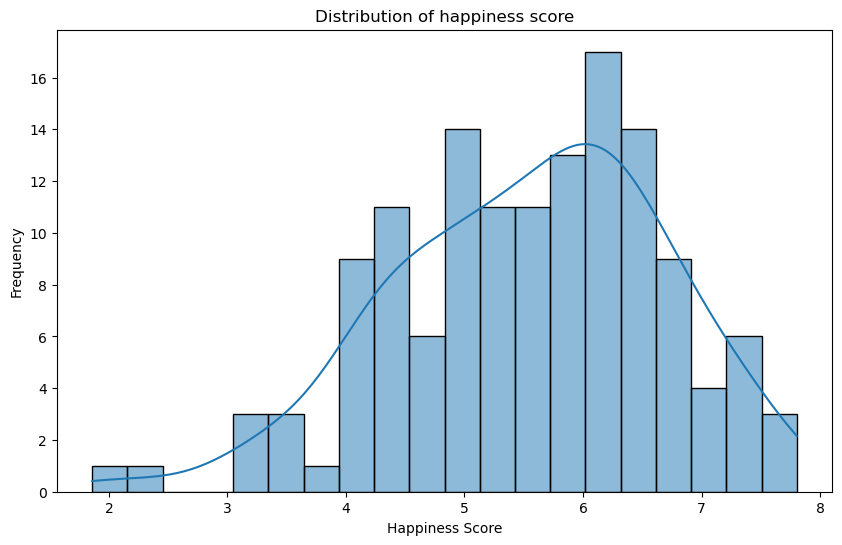

In [46]:
# Univariate analysis 
# Histogram plot of happiness score
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='happiness_score', bins=20, kde=True)
plt.title('Distribution of happiness score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

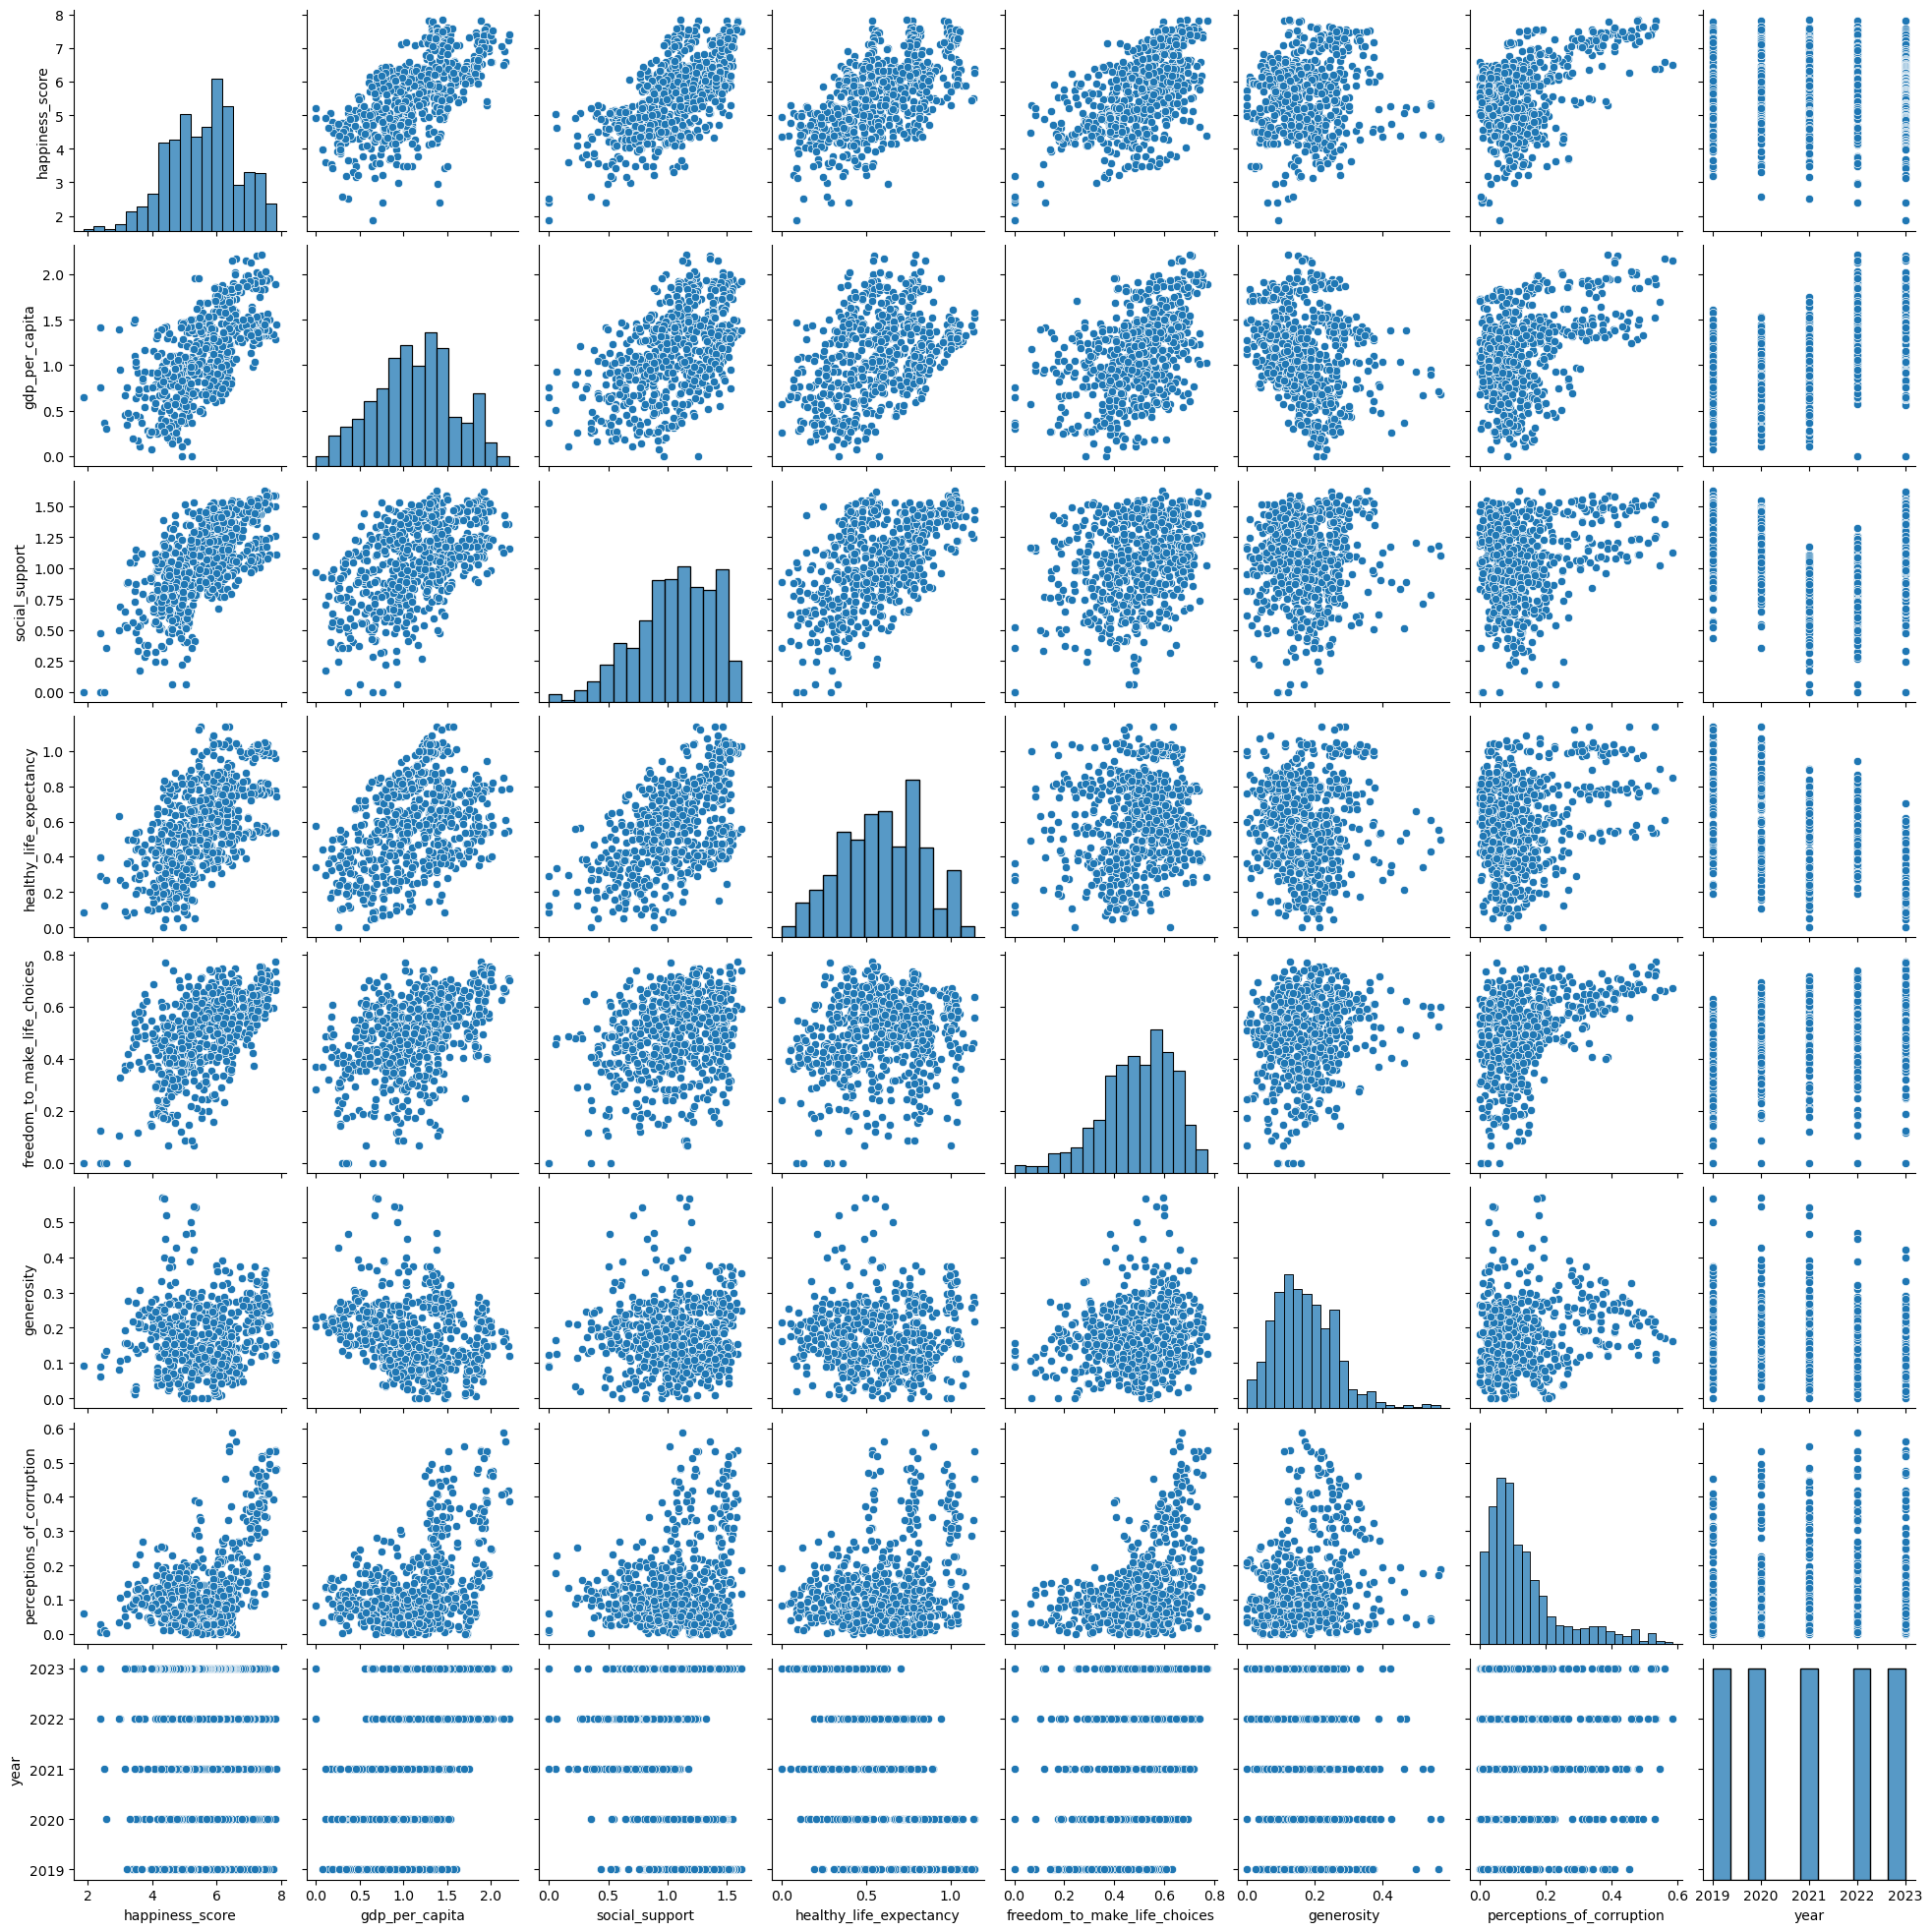

In [47]:
sns.pairplot(df)
plt.show()

In [48]:
# drop the categorical features 
df_numeric = df.drop(['country', 'region'], axis = 1)
print(df_numeric.columns)

Index(['happiness_score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')


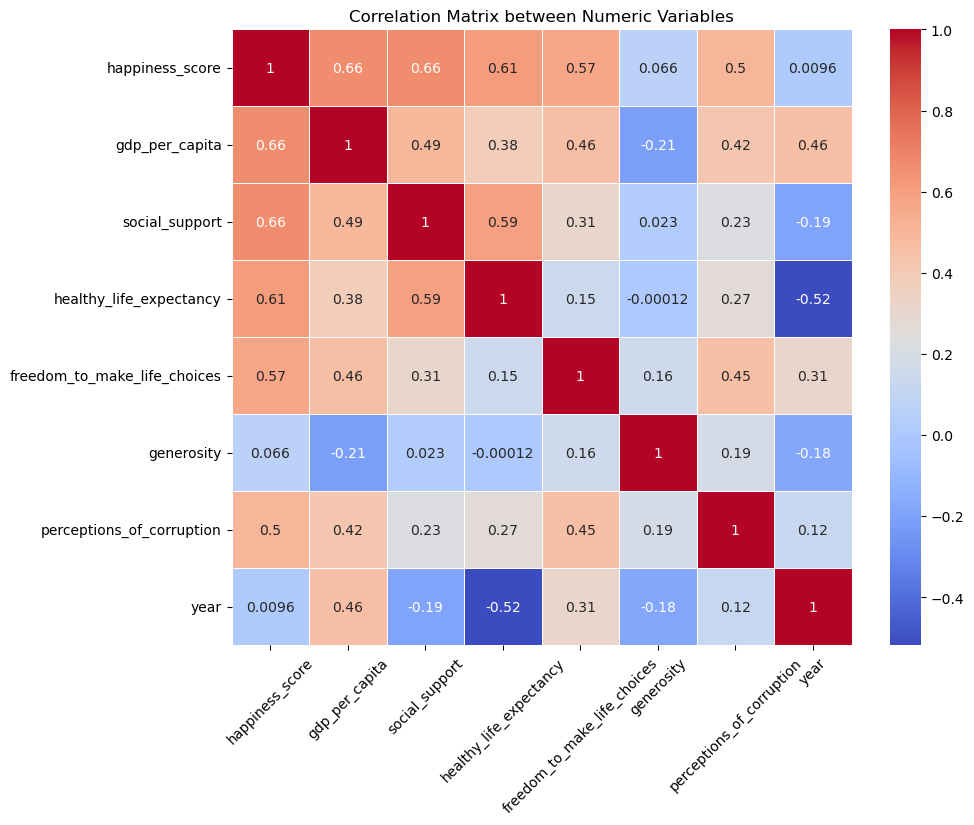

In [49]:
# plot the heatmap for correlation matrix of numeric features
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Numeric Variables')
plt.xticks(rotation = 45)
plt.show()

In [50]:
"""
Our target feature is happiness score.

Accorrding to the heatmap, happiness_score has relatively relatively strong positive relationship with gdp_per_capita, social support, 
healthy_life_expectancy (>0.6).

"""

'\nOur target feature is happiness score.\n\nAccorrding to the heatmap, happiness_score has relatively relatively strong positive relationship with gdp_per_capita, social support, \nhealthy_life_expectancy (>0.6).\n\n'

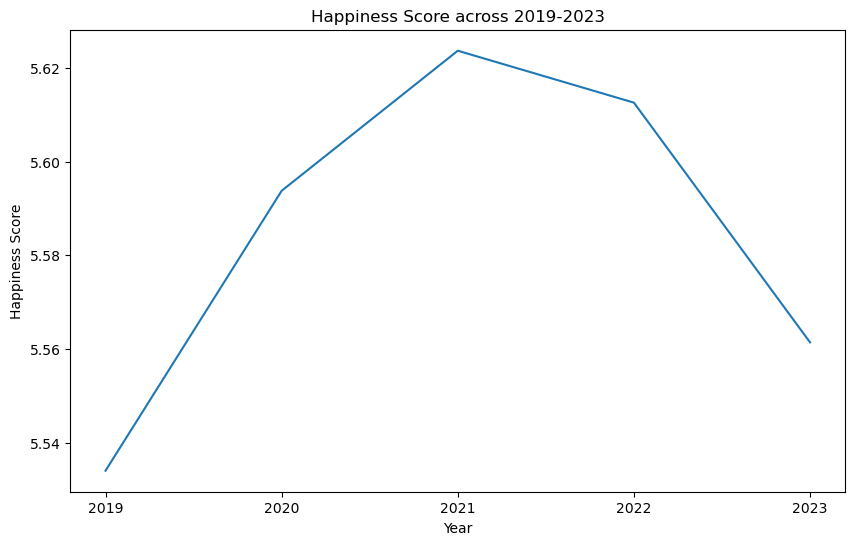

In [51]:
# Bivariate analysis
# plot of happiness score across 5 years
plt.figure(figsize=(10, 6))
sns.lineplot(data = df_numeric, x="year", y="happiness_score", errorbar=None)
plt.title("Happiness Score across 2019-2023")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.xticks(np.arange(2019, 2024, 1))
plt.show()

#### Result: we found 2021 had highest happiness score

<Axes: xlabel='country', ylabel='happiness_score'>

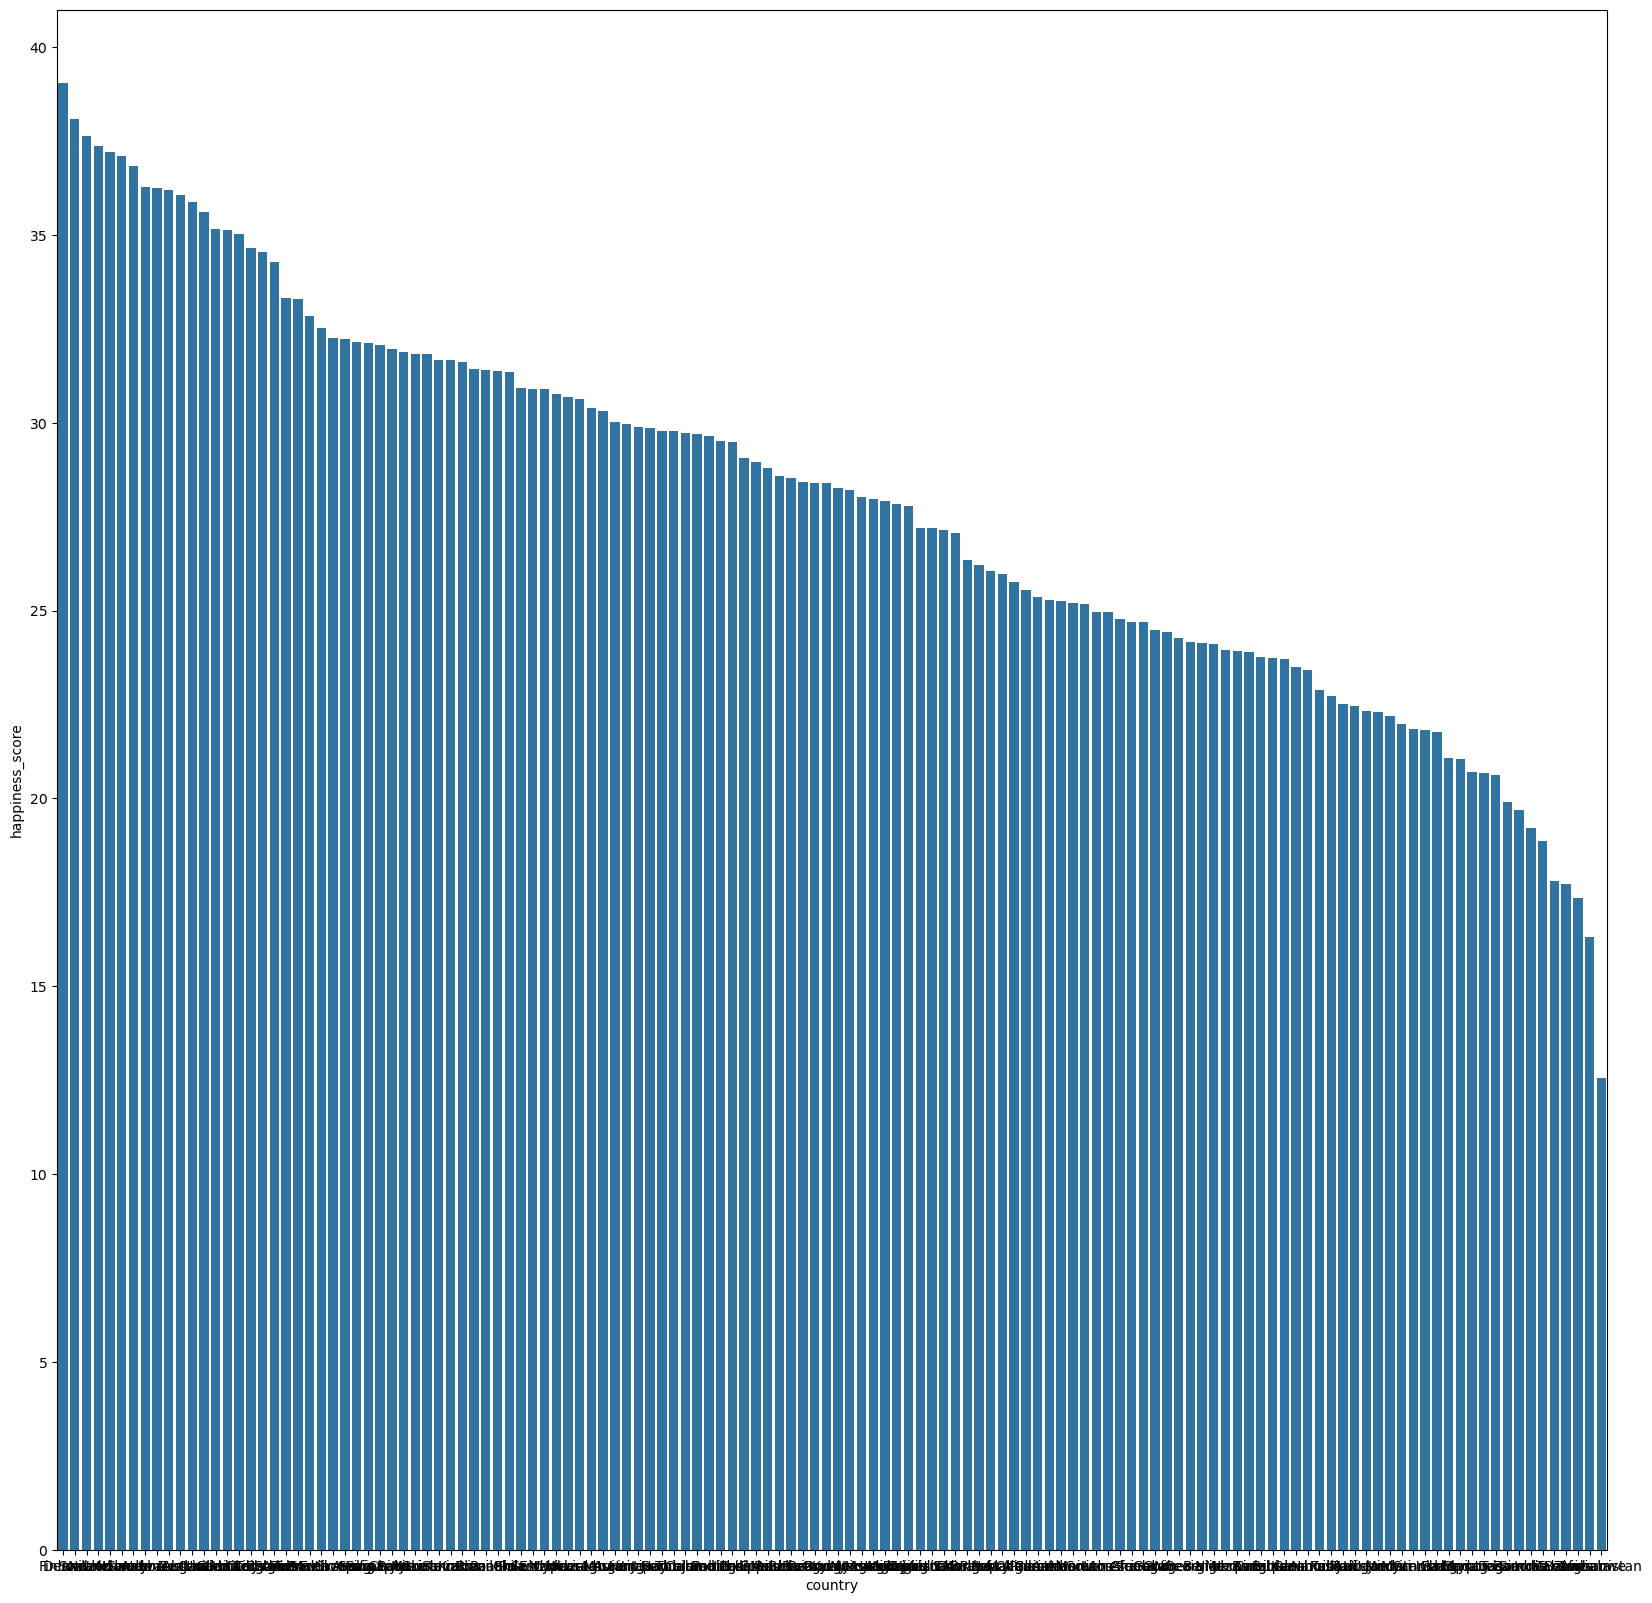

In [52]:
sum_happiness = (df.groupby("country")["happiness_score"].sum()).sort_values(ascending = False)
plt.figure(figsize = (20,20))
sns.barplot(data = sum_happiness)

In [53]:
# top 10 happy countries
print(sum_happiness[0:10])

# least 10 happy countries
print(sum_happiness[-1:-11:-1])

country
Finland        39.0447
Denmark        38.0876
Iceland        37.6395
Switzerland    37.3629
Netherlands    37.2189
Norway         37.1140
Sweden         36.8385
Luxembourg     36.2835
Israel         36.2616
New Zealand    36.2066
Name: happiness_score, dtype: float64
country
Afghanistan     12.5559
Zimbabwe        16.3062
Botswana        17.3399
Tanzania        17.7262
Malawi          17.7930
Sierra Leone    18.8614
India           19.2203
Zambia          19.6814
Lebanon         19.8995
Togo            20.6282
Name: happiness_score, dtype: float64


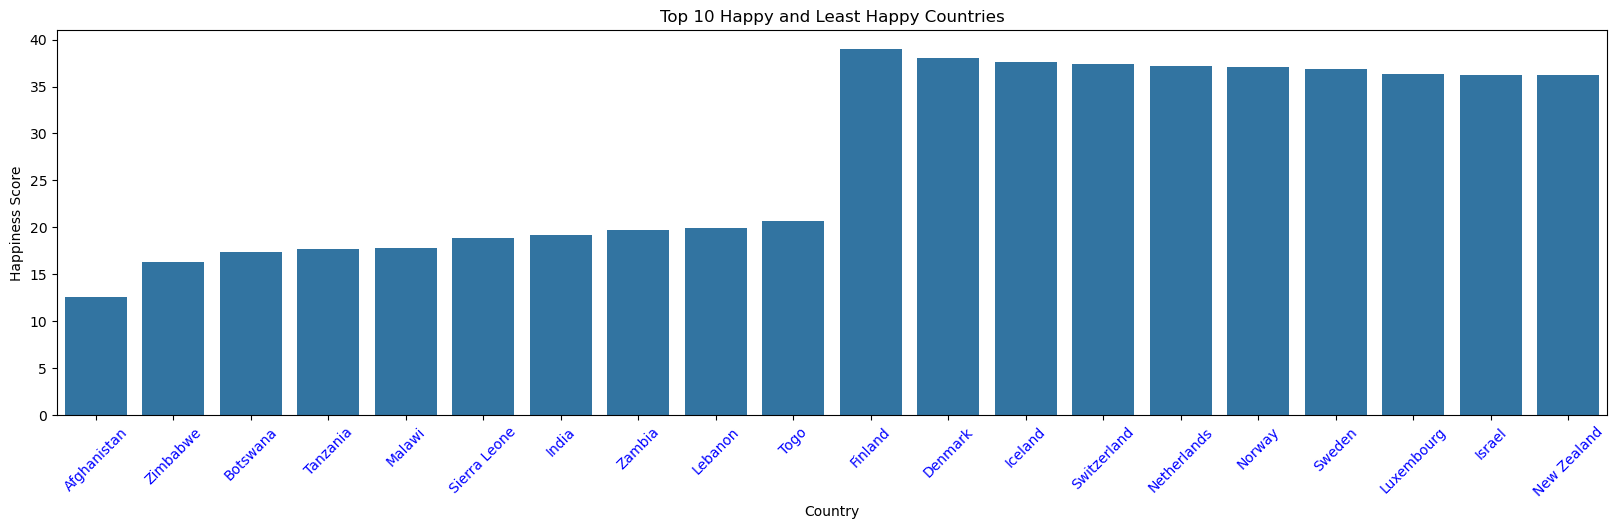

In [54]:
# Bar plot of top 10 and least 10 happy countries
top_10 = sum_happiness[0:10]
least_10 = sum_happiness[-1:-11:-1]
top_least_10 = pd.concat([least_10, top_10])

plt.figure(figsize = (20,5))
sns.barplot(x=top_least_10.index, y=top_least_10.values)
plt.title('Top 10 Happy and Least Happy Countries')
plt.xlabel('Country')
x_label_least10 = least_10.index
x_label_top10 = top_10.index
plt.xticks(ticks = range(0, 20) , labels =np.append(x_label_least10, x_label_top10) , rotation =45, color = "blue")
plt.ylabel('Happiness Score')
plt.show()

In [55]:
# mean of each country for 5 years
(df.groupby("country")["happiness_score"].mean()).sort_values()

country
Afghanistan    2.51118
Zimbabwe       3.26124
Botswana       3.46798
Tanzania       3.54524
Malawi         3.55860
                ...   
Netherlands    7.44378
Switzerland    7.47258
Iceland        7.52790
Denmark        7.61752
Finland        7.80894
Name: happiness_score, Length: 132, dtype: float64

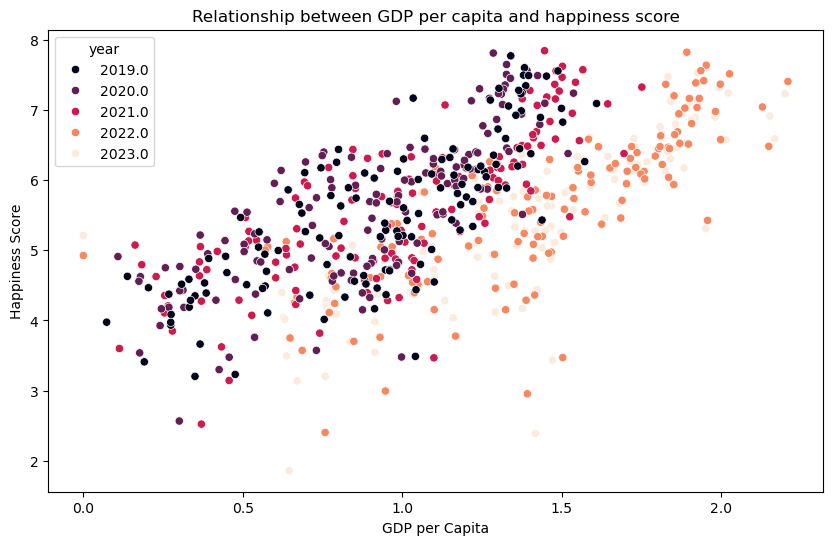

In [56]:
# Scatter plot between GDP per capita and happiness score
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='gdp_per_capita', y='happiness_score', hue='year', palette ="rocket")
plt.title('Relationship between GDP per capita and happiness score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


### Analysis --- Linear Regression

In [57]:
# We use numeric features as x
x = df_numeric.drop("happiness_score", axis = 1)
y = df_numeric["happiness_score"]

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creating an instance of LinearRegression class
lg = linear_model.LinearRegression()
print(lg)
print(type(lg))

# split data into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [58]:
from sklearn.preprocessing import StandardScaler
# creating an instance of Standard Scaler
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_scaled_train = std_scaler.transform(x_train)

In [59]:
lg.fit(x_scaled_train, y_train)

LinearRegression()

In [60]:
print(lg.coef_) 
print(lg.intercept_)

[ 0.31225436  0.26981534  0.28818164  0.26343165  0.06292179  0.14104131
 -0.03150427]
5.594182383806821


In [61]:
df_numeric.columns

Index(['happiness_score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

In [62]:
"""
happiness_socre = 5.59 + 0.31*gdp_per_capita + 0.27*social_support + 0.29*healthy_life_expectancy + 0.26*freedom_to_make_life_choices 
+ 0.06*generosity + 0.14*perceptions_of_corruption - 0.05*year
"""

'\nhappiness_socre = 5.59 + 0.31*gdp_per_capita + 0.27*social_support + 0.29*healthy_life_expectancy + 0.26*freedom_to_make_life_choices \n+ 0.06*generosity + 0.14*perceptions_of_corruption - 0.05*year\n'

In [63]:
x_scaled_test = std_scaler.transform(x_test)
y_pred = lg.predict((x_scaled_test))

y_pred_train = lg.predict(x_scaled_train)

In [64]:
from sklearn.metrics import r2_score
# sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)

print("r-squared for the test data: ", r2_score(y_test, y_pred)) # y_pred = reg.predict(x_scaled_test) 
    
print("r-squared for the train data: ", r2_score(y_train, y_pred_train)) 

r-squared for the test data:  0.720829646287505
r-squared for the train data:  0.7395813081547488


#  -----test the model containing country to see the r squared---strart

In [65]:
# convert categorical to numeric
print(df_categorical["country"].unique())
print(df_categorical["country"].unique().size)
df_country_test = df.copy()
df_country_test = df_country_test.drop("region", axis = 1)
df_country_test.replace(df_country_test["country"].unique(),range(1,133), inplace = True)
df_country_test

['Finland' 'Denmark' 'Iceland' 'Israel' 'Netherlands' 'Sweden' 'Norway'
 'Switzerland' 'Luxembourg' 'New Zealand' 'Austria' 'Australia' 'Canada'
 'Ireland' 'United States' 'Germany' 'Belgium' 'United Kingdom'
 'Lithuania' 'France' 'Slovenia' 'Costa Rica' 'Romania' 'Singapore'
 'United Arab Emirates' 'Taiwan Province of China' 'Uruguay' 'Slovakia'
 'Saudi Arabia' 'Estonia' 'Spain' 'Italy' 'Kosovo' 'Chile' 'Mexico'
 'Malta' 'Panama' 'Poland' 'Nicaragua' 'Latvia' 'Bahrain' 'Guatemala'
 'Kazakhstan' 'Serbia' 'Cyprus' 'Japan' 'Croatia' 'Brazil' 'El Salvador'
 'Hungary' 'Argentina' 'Honduras' 'Uzbekistan' 'Malaysia' 'Portugal'
 'South Korea' 'Greece' 'Mauritius' 'Thailand' 'Mongolia' 'Kyrgyzstan'
 'Moldova' 'China' 'Vietnam' 'Paraguay' 'Montenegro' 'Jamaica' 'Bolivia'
 'Russia' 'Bosnia and Herzegovina' 'Colombia' 'Dominican Republic'
 'Ecuador' 'Peru' 'Philippines' 'Bulgaria' 'Nepal' 'Armenia' 'Tajikistan'
 'Algeria' 'Hong Kong S.A.R. of China' 'Albania' 'Indonesia'
 'South Africa' 'North Ma

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,1,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023.0
1,2,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023.0
2,3,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023.0
3,4,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023.0
4,5,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023.0
...,...,...,...,...,...,...,...,...,...
679,128,3.488,1.041,1.145,0.538,0.455,0.025,0.100,2019.0
681,129,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019.0
682,130,4.374,0.268,0.841,0.242,0.309,0.252,0.045,2019.0
683,131,5.197,0.987,1.224,0.815,0.216,0.166,0.027,2019.0


In [66]:
# 
x_AA = df_country_test
y_AA = df_country_test["happiness_score"]

# creating an instance of LinearRegression class
lg_country_test = linear_model.LinearRegression()

# split data into x_train, x_test, y_train, y_test
xAA_train, xAA_test, yAA_train, yAA_test = train_test_split(x_AA, y_AA, test_size=0.2, random_state=4)

In [67]:
# creating an instance of Standard Scaler
std_scaler_AA = StandardScaler()
std_scaler_AA.fit(xAA_train)
xAA_scaled_train = std_scaler_AA.transform(xAA_train)
# train the model
lg_country_test.fit(xAA_scaled_train, yAA_train)

LinearRegression()

In [68]:
print(lg_country_test.coef_) 
print(lg_country_test.intercept_)

[ 4.60792490e-17  1.07425717e+00  2.07723359e-16 -2.16855484e-16
 -4.77491044e-17  1.79763729e-17  3.31070568e-17  2.51709051e-16
  5.03780211e-17]
5.59418238380682


In [69]:
xAA_scaled_test = std_scaler_AA.transform(xAA_test)
yAA_pred = lg_country_test.predict((xAA_scaled_test))

yAA_pred_train = lg_country_test.predict(xAA_scaled_train)

In [70]:
print("r-squared for the test data: ", r2_score(yAA_test, yAA_pred)) # y_pred = reg.predict(x_scaled_test) 
print("r-squared for the train data: ", r2_score(yAA_train, yAA_pred_train)) 

r-squared for the test data:  1.0
r-squared for the train data:  1.0


#  -----test the model containing country to see the r squared---end

In [71]:
from statsmodels.api import OLS
import statsmodels.api as sm
X1 = x_scaled_train.copy()
Y1 = y_train.copy()

X1 = sm.add_constant(X1) # for intercept
X1 = list(X1)
Y1 = list(Y1)
model1 = sm.OLS(Y1,X1)
print(type(model1))
results = model1.fit()
print(results.summary()) 

<class 'statsmodels.regression.linear_model.OLS'>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sat, 11 May 2024   Prob (F-statistic):          1.87e-147
Time:                        02:23:18   Log-Likelihood:                -431.82
No. Observations:                 528   AIC:                             879.6
Df Residuals:                     520   BIC:                             913.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

### The p-value for feature year >0.05, so we drop the feature year to the difference:

In [72]:
# if p-value < 0.05, we consider removing the corresponding independent feature which is year

In [73]:
# remove year from independent variable
x1 = df_numeric.drop(columns = ["happiness_score", "year"], axis = 1)
y1 = df_numeric["happiness_score"]

from sklearn import linear_model
from sklearn.model_selection import train_test_split
# creating an instance of LinearRegression class
lg_1 = linear_model.LinearRegression()
print(lg_1)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=4)



LinearRegression()


In [74]:
from sklearn.preprocessing import StandardScaler
# creating an instance of Standard Scaler
std_scaler_1 = StandardScaler()
std_scaler_1.fit(x1_train)
x1_scaled_train = std_scaler_1.transform(x1_train)

In [75]:
lg_1.fit(x1_scaled_train, y1_train)

LinearRegression()

In [76]:
print(lg_1.coef_) 
print(lg_1.intercept_)

[0.28929874 0.27462438 0.31105248 0.25903929 0.06413935 0.14146451]
5.594182383806819


In [77]:
"""
After dropping year from independent features:
happiness_socre = 5.59 + 0.29*gdp_per_capita + 0.27*social_support + 0.31*healthy_life_expectancy + 0.26*freedom_to_make_life_choices 
+ 0.06*generosity + 0.14*perceptions_of_corruption
"""

'\nAfter dropping year from independent features:\nhappiness_socre = 5.59 + 0.29*gdp_per_capita + 0.27*social_support + 0.31*healthy_life_expectancy + 0.26*freedom_to_make_life_choices \n+ 0.06*generosity + 0.14*perceptions_of_corruption\n'

In [78]:
x1_scaled_test = std_scaler_1.transform(x1_test)
y1_pred = lg_1.predict((x1_scaled_test))

y1_pred_train = lg_1.predict(x1_scaled_train)

In [79]:
from sklearn.metrics import r2_score
print("r-squared for the test data: ", r2_score(y1_test, y1_pred)) # y_pred = reg.predict(x_scaled_test) 
print("r-squared for the train data: ", r2_score(y1_train, y1_pred_train)) 

r-squared for the test data:  0.7206155368820857
r-squared for the train data:  0.7393964817080418


In [80]:
"""
The r squared is almost no difference between model with feature year and model without feature year
"""

'\nThe r squared is almost no difference between model with feature year and model without feature year\n'

In [81]:
X2 = x1_scaled_train.copy()
Y2 = y1_train.copy()

X2 = sm.add_constant(X2) # for intercept
X2 = list(X2)
Y2 = list(Y2)
model_2 = sm.OLS(Y2,X2)
results_2 = model_2.fit()
print(results_2.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     246.4
Date:                Sat, 11 May 2024   Prob (F-statistic):          1.37e-148
Time:                        02:23:18   Log-Likelihood:                -432.00
No. Observations:                 528   AIC:                             878.0
Df Residuals:                     521   BIC:                             907.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5942      0.024    232.840      0.0

### Lasso Regression

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

x = df[["gdp_per_capita","social_support", "healthy_life_expectancy", "freedom_to_make_life_choices", "generosity","perceptions_of_corruption", "year"]]
y = df["happiness_score"]


ridgeReg = Ridge(alpha=5)

ridgeReg.fit(x_scaled_train, y_train)

ridge_y_pred = ridgeReg.predict(x_scaled_test)

ridge_mse_test = mean_squared_error(y_test, ridge_y_pred)

ridge_mse_train = mean_squared_error(y_train, ridgeReg.predict(x_scaled_train))

print("ridge_mse_train: ", ridge_mse_train)
print("ridge_mse_test: ", ridge_mse_test)

# Calculating r-squared of Ridge Regression

# returns the r-squared value of train set
r2_ridge_train = ridgeReg.score(x_scaled_train, y_train)

# returns the r-squared value of test set
r2_ridge_test = ridgeReg.score(x_scaled_test, y_test) 
print("r2_ridge_test: ", r2_ridge_test)
print("r2_ridge_train: ", r2_ridge_train)

print(ridgeReg.coef_, ridgeReg.intercept_)

ridge_mse_train:  0.30054538910540746
ridge_mse_test:  0.3336403029203815
r2_ridge_test:  0.720566344767366
r2_ridge_train:  0.7395684810485568
[ 0.3089731   0.26996185  0.28754345  0.2618391   0.06201907  0.14186314
 -0.02986302] 5.59418238380682


### Logistic Regression

In [83]:
# class: happy/not_happy, happy = 1, not_happy =0

# build a dataframe contaning an extra column "happy_or_not"
df_happy_or_not = df_numeric.copy()
mean_happiness = df_happy_or_not["happiness_score"].mean()

df_happy_or_not["happy_or_not"] = df_happy_or_not["happiness_score"]
df_happy_or_not["happy_or_not"] = df_happy_or_not["happy_or_not"].where(cond = df_happy_or_not["happy_or_not"]>=mean_happiness, other = 0)
df_happy_or_not["happy_or_not"] = df_happy_or_not["happy_or_not"].where(cond = df_happy_or_not["happy_or_not"]== 0, other = 1)
print(df_happy_or_not)

x_logi = df_happy_or_not[["gdp_per_capita","social_support", "healthy_life_expectancy", "freedom_to_make_life_choices", "generosity","perceptions_of_corruption", "year"]]
y_logi = df_happy_or_not["happy_or_not"]

x_train_logi, x_test_logi, y_train_logi, y_test_logi = train_test_split(x_logi, y_logi, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(x_train_logi) 

x_train_logi_sc = scaler.transform(x_train_logi) 

x_test_logi_sc = scaler.transform(x_test_logi)

     happiness_score  gdp_per_capita  social_support  healthy_life_expectancy  \
0              7.804           1.888           1.585                    0.535   
1              7.586           1.949           1.548                    0.537   
2              7.530           1.926           1.620                    0.559   
3              7.473           1.833           1.521                    0.577   
4              7.403           1.942           1.488                    0.545   
..               ...             ...             ...                      ...   
679            3.488           1.041           1.145                    0.538   
681            3.663           0.366           1.114                    0.433   
682            4.374           0.268           0.841                    0.242   
683            5.197           0.987           1.224                    0.815   
684            3.203           0.350           0.517                    0.361   

     freedom_to_make_life_c

In [84]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')
logistic_model.fit(x_train_logi_sc, y_train_logi)

LogisticRegression(C=1)

In [85]:
logistic_y_pred = logistic_model.predict(x_test_logi_sc)

In [86]:
print(logistic_model.coef_, logistic_model.intercept_)

[[ 1.14441138  1.21883798  1.12502504  1.51464924 -0.23789663 -0.2788841
  -0.06764303]] [-0.403241]


In [87]:
# biuld confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_logi, logistic_y_pred)

array([[49, 13],
       [ 8, 62]], dtype=int64)

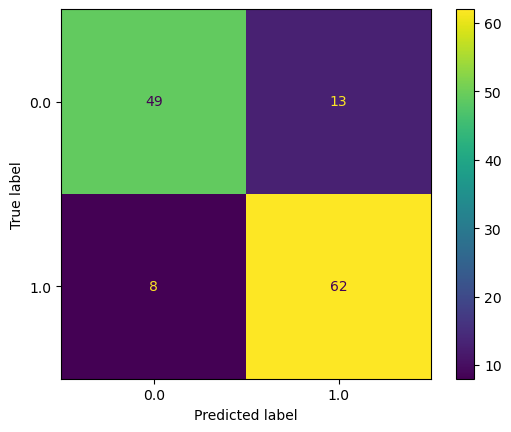

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_logistic = confusion_matrix(y_test_logi, logistic_y_pred, labels = logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels = logistic_model.classes_)
disp.plot()
plt.show()

In [89]:
from sklearn.metrics import accuracy_score
print("Accuracy is: {:0.2f}".format(accuracy_score(y_test_logi, logistic_y_pred)))

Accuracy is: 0.84


In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

logit_roc_auc = roc_auc_score(y_test_logi, logistic_y_pred)
print("Logistic AUC is: {:0.2f}".format(logit_roc_auc))
print(classification_report(y_test_logi, logistic_y_pred))

Logistic AUC is: 0.84
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82        62
         1.0       0.83      0.89      0.86        70

    accuracy                           0.84       132
   macro avg       0.84      0.84      0.84       132
weighted avg       0.84      0.84      0.84       132



In [91]:
from sklearn.metrics import roc_curve
b = logistic_model.predict_proba(x_test_logi_sc)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test_logi, b)

[0.28297015 0.02096159 0.97757378 0.5056114  0.00961113]


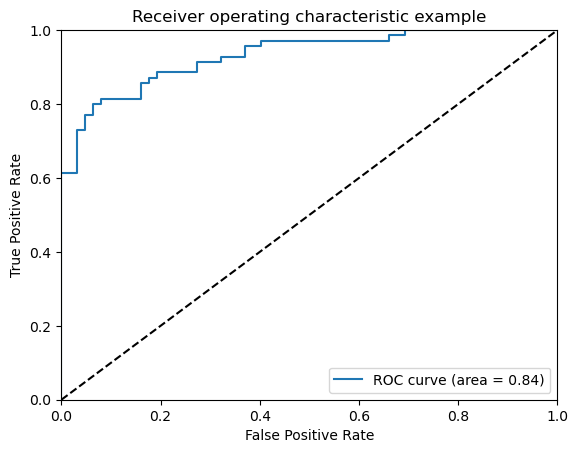

In [92]:
# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = {:0.2f})".format(logit_roc_auc))
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="best")
plt.show()

### K-mean clustering

In [93]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings 
warnings.filterwarnings('ignore')

k= 2
kmean_Model.inertia_ is: 1497.0587208707339
k= 3
kmean_Model.inertia_ is: 1026.7602115281607
k= 4
kmean_Model.inertia_ is: 716.8213270617981
k= 5
kmean_Model.inertia_ is: 604.7082260482806
k= 6
kmean_Model.inertia_ is: 509.224119280422
k= 7
kmean_Model.inertia_ is: 463.10056293890034
k= 8
kmean_Model.inertia_ is: 420.86559369552475
k= 9
kmean_Model.inertia_ is: 386.051539567452
inertia_list: [1497.0587208707339, 1026.7602115281607, 716.8213270617981, 604.7082260482806, 509.224119280422, 463.10056293890034, 420.86559369552475, 386.051539567452]


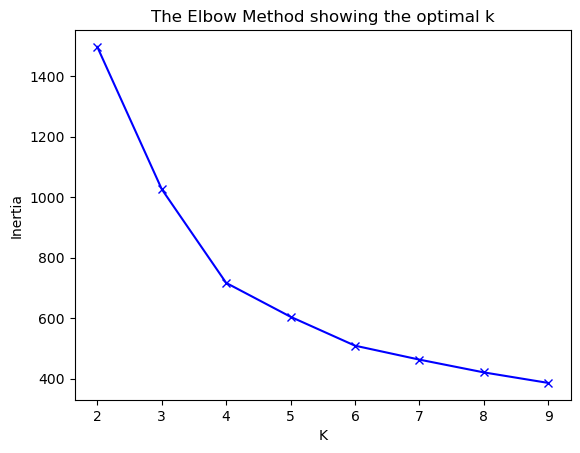

In [94]:
# determine k
inertia_list = []
K = range(2, 10)
for k in K:
    print("k=", k)
    kmean_Model = KMeans(n_clusters=k).fit(df_happy_or_not) # default n_init="auto"
    inertia_list.append(kmean_Model.inertia_)
    print("kmean_Model.inertia_ is:", kmean_Model.inertia_)
print("inertia_list:", inertia_list)

# Plot the elbow
plt.plot(K, inertia_list, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [95]:
# use k =5 
x = df_happy_or_not
print(x.shape)
kmean_model_5 = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0).fit(x)

(660, 9)


In [96]:
y_kmean = kmean_model_5.predict(x)

print(df_happy_or_not.columns)
print(kmean_model_5.cluster_centers_) # The cluster centre value is the value of the centroid

Index(['happiness_score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year', 'happy_or_not'],
      dtype='object')
[[ 6.44929015e+00  1.15103619e+00  1.38584368e+00  8.88491921e-01
   5.05729363e-01  1.88605186e-01  1.53750574e-01  2.01950758e+03
   1.00000000e+00]
 [ 6.40692361e+00  1.69372222e+00  1.24332639e+00  5.77958333e-01
   6.04131944e-01  1.44743056e-01  1.84263889e-01  2.02252778e+03
   9.65277778e-01]
 [ 6.39901370e+00  1.25210959e+00  9.68821918e-01  6.69657534e-01
   5.64438356e-01  1.68753425e-01  1.63726027e-01  2.02100000e+03
   9.45205479e-01]
 [ 4.67855757e+00  6.76585876e-01  1.03002208e+00  5.84833661e-01
   3.75911730e-01  1.89980684e-01  8.46658999e-02  2.01949242e+03
  -3.33066907e-16]
 [ 4.62323464e+00  9.47849162e-01  7.18698324e-01  3.63899441e-01
   4.45558659e-01  1.69955307e-01  1.05553073e-01  2.02198324e+03
  -3.33066907e-16]]


### We randomly pick a data from data 2021 to see the result using the kmean model we just built.

In [97]:
df_2021 = pd.read_csv("WHR_2021.csv")
print("2021 data has {} rows and {} columns".format(df_2021.shape[0], df_2021.shape[1]))
   
df_2021["year"] = 2021

2021 data has 149 rows and 9 columns


In [98]:
df_2021.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

In [99]:
# mean_happiness = df_happy_or_not["happiness_score"].mean()
df_2021 = df_2021.drop(["country", "region"], axis = 1)
df_2021["happy_or_not"] = df_2021["happiness_score"]
df_2021["happy_or_not"] = df_2021["happy_or_not"].where(cond = df_2021["happy_or_not"]>=mean_happiness, other = 0)
df_2021["happy_or_not"] = df_2021["happy_or_not"].where(cond = df_2021["happy_or_not"]== 0, other = 1)
print(df_2021)

     happiness_score  gdp_per_capita  social_support  healthy_life_expectancy  \
0              7.842           1.446           1.106                    0.741   
1              7.620           1.502           1.108                    0.763   
2              7.571           1.566           1.079                    0.816   
3              7.554           1.482           1.172                    0.772   
4              7.464           1.501           1.079                    0.753   
..               ...             ...             ...                      ...   
144            3.512           0.451           0.731                    0.007   
145            3.467           1.099           0.724                    0.340   
146            3.415           0.364           0.202                    0.407   
147            3.145           0.457           0.649                    0.243   
148            2.523           0.370           0.000                    0.126   

     freedom_to_make_life_c

In [100]:
# randomly select a index number
import random
random_number = random.randint(0,152)
print(random_number) 

chosen = (df_2021.iloc[random_number]).to_numpy().reshape(1,-1)
print(chosen)

83
[[5.339e+00 1.061e+00 7.850e-01 6.650e-01 6.360e-01 9.300e-02 1.170e-01
  2.021e+03 0.000e+00]]


In [101]:
prediction = kmean_model_5.predict(chosen)
print("The data from row {0} of dataframe 2021 fall in the group {1}.".format(random_number, prediction))

The data from row 83 of dataframe 2021 fall in the group [4].
